# Trabajo final, preparación de datos

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [116]:
data = pd.read_csv("Cancer_Data.csv", sep=',')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [118]:
#Revisamos si tenemos ID repetidos
ids = data['id'].value_counts()
ids[ids > 1]

Series([], Name: id, dtype: int64)

In [119]:
#Corrección del tipo de datos object a categorías
data['diagnosis']=data['diagnosis'].astype('category')

In [120]:
#Eliminamos variables irrelevantes
data.drop(data.columns[32],axis=1,inplace = True)
data.drop(data.columns[0],axis=1,inplace = True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   diagnosis                569 non-null    category
 1   radius_mean              569 non-null    float64 
 2   texture_mean             569 non-null    float64 
 3   perimeter_mean           569 non-null    float64 
 4   area_mean                569 non-null    float64 
 5   smoothness_mean          569 non-null    float64 
 6   compactness_mean         569 non-null    float64 
 7   concavity_mean           569 non-null    float64 
 8   concave points_mean      569 non-null    float64 
 9   symmetry_mean            569 non-null    float64 
 10  fractal_dimension_mean   569 non-null    float64 
 11  radius_se                569 non-null    float64 
 12  texture_se               569 non-null    float64 
 13  perimeter_se             569 non-null    float64 
 14  area_se   

# 3. Descripción estadística

In [121]:
#Conocemos un poco los datos numéricos
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [122]:
categoricas = (data.dtypes == "category")
categoricas_list = list(categoricas[categoricas].index)

print("Variables categóricas:")
print(categoricas_list)

Variables categóricas:
['diagnosis']


In [123]:
numericos = (data.dtypes == "float64")
numericos_list = list(numericos[numericos].index)

print("Variables numéricas:")
print(numericos_list)

Variables numéricas:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


<Axes: >

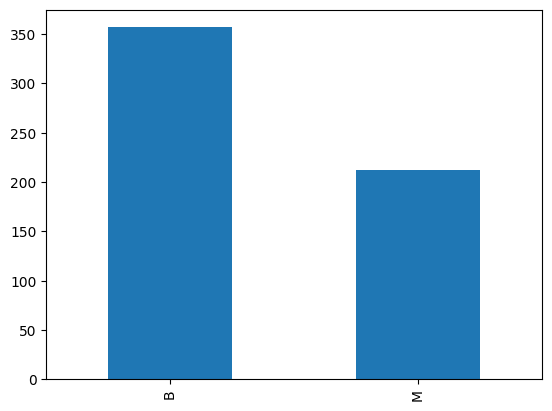

In [124]:
data['diagnosis'].value_counts().plot(kind='bar')

In [125]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} histograma".format(variable))
    plt.show()
    print('\n')

def plot_box(var):
    plt.figure(figsize = (9,3))
    plt.boxplot(data[var])
    plt.xlabel(var)
    
    plt.title("{} caja de bigotes".format(var))
    plt.show()
    print('\n')

In [126]:
#for n in numericos_list:
    #plot_hist(n)

In [127]:
#for n in numericos_list:
    #plot_box(n)

In [128]:
#falta eliminar atípicos si los hay

In [129]:
# Gráficas para identificar relaciones entre las variables
#pd.plotting.scatter_matrix(data, figsize=(10,10))

# 3. Análisis de correlaciones

In [130]:
#Correlaciones: variables numéricas
data.corr()

<ipython-input-130-12ca03f88c79>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [131]:
# Todas las variables deben ser numéricas para calcular las correlaciones
# Se crean dummies para las variables categóricas
 
data_num = pd.get_dummies(data, drop_first=True)
data_num.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [132]:
#Correlaciones 
data_num.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


<Axes: >

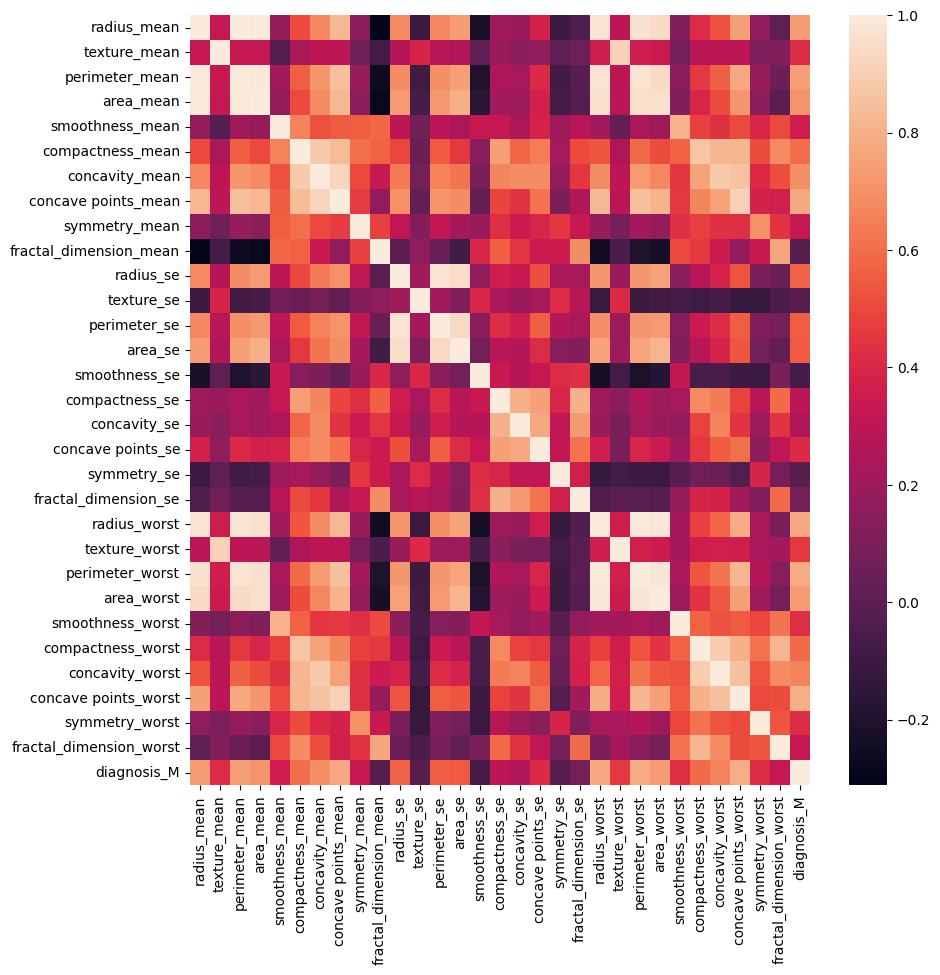

In [133]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr(),annot=False)

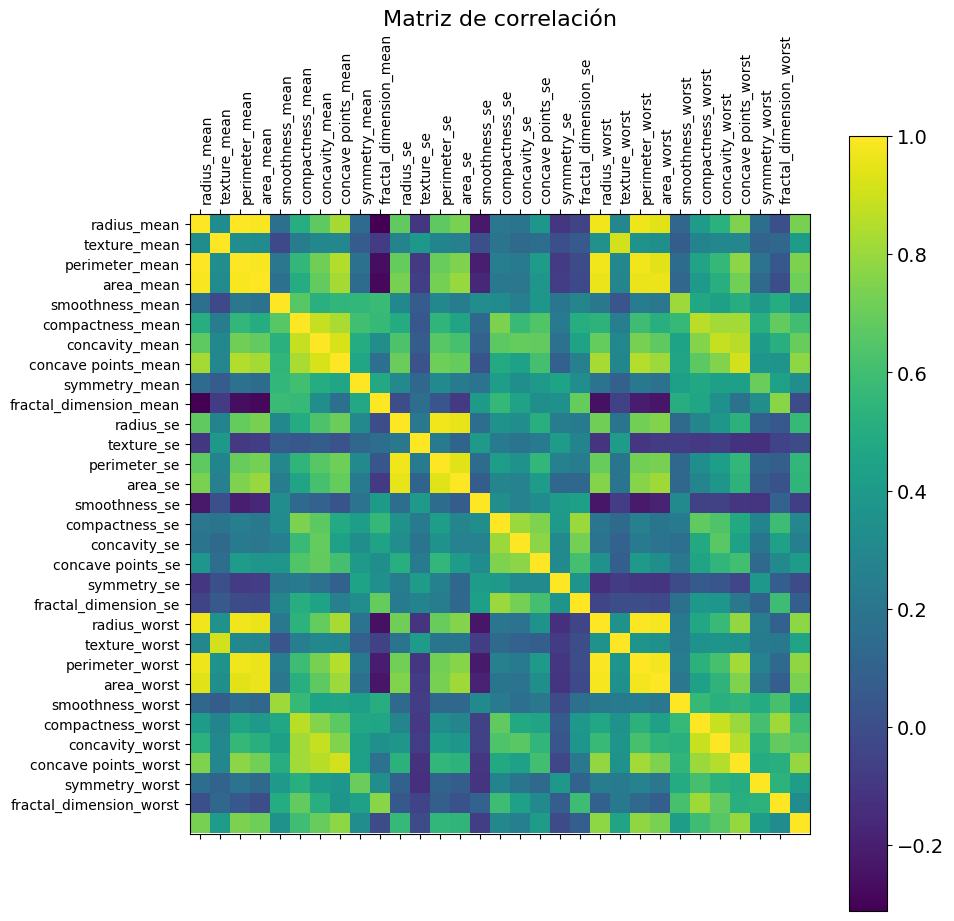

In [134]:
f = plt.figure(figsize=(10, 10))
plt.matshow(data_num.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=10, rotation=90, ha="left")
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlación', fontsize=16);

In [135]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [136]:
#HAY QUE BORRAR MUCHAS POR CORRELACIONES MUY ALTAS
corr_matrix = data_num.corr().abs()
#Solo seleccionamos uno de los dos triángulos de la matriz.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Encontrar correlaciones mayores a 0.85
#upper = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=0).astype(np.bool))
#print(upper)
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

#drop highly correlated features
print(to_drop)
data_num.drop(to_drop, axis=1, inplace=True)


['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'perimeter_se', 'area_se', 'concavity_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'fractal_dimension_worst']


<ipython-input-136-ca6564774442>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [137]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   compactness_mean        569 non-null    float64
 4   symmetry_mean           569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   radius_se               569 non-null    float64
 7   texture_se              569 non-null    float64
 8   smoothness_se           569 non-null    float64
 9   compactness_se          569 non-null    float64
 10  concave points_se       569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  symmetry_worst          569 non-null    float64
 13  diagnosis_M             569 non-null    uint8  
dtypes: float64(13), uint8(1)
memory usage: 58.

In [138]:
correlaciones=data_num.corr()
correlaciones

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concave points_se,symmetry_se,symmetry_worst,diagnosis_M
radius_mean,1.000000,0.323782,0.170581,0.506124,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.376169,-0.104321,0.163953,0.730029
texture_mean,0.323782,1.000000,-0.023389,0.236702,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.163851,0.009127,0.105008,0.415185
smoothness_mean,0.170581,-0.023389,1.000000,0.659123,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.380676,0.200774,0.394309,0.358560
compactness_mean,0.506124,0.236702,0.659123,1.000000,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.642262,0.229977,0.510223,0.596534
symmetry_mean,0.147741,0.071401,0.557775,0.602641,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.393298,0.449137,0.699826,0.330499
fractal_dimension_mean,-0.311631,-0.076437,0.584792,0.565369,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.341198,0.345007,0.334019,-0.012838
radius_se,0.679090,0.275869,0.301467,0.497473,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.513346,0.240567,0.094543,0.567134
texture_se,-0.097317,0.386358,0.068406,0.046205,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.230283,0.411621,-0.128215,-0.008303
smoothness_se,-0.222600,0.006614,0.332375,0.135299,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.328429,0.413506,-0.107342,-0.067016
compactness_se,0.206000,0.191975,0.318943,0.738722,0.421659,0.559837,0.356065,0.231700,0.336696,1.000000,0.744083,0.394713,0.277878,0.292999


In [139]:
#Correlaciones con la variable de interés
cor_variable_objetivo=correlaciones.loc['diagnosis_M']
cor_variable_objetivo

radius_mean               0.730029
texture_mean              0.415185
smoothness_mean           0.358560
compactness_mean          0.596534
symmetry_mean             0.330499
fractal_dimension_mean   -0.012838
radius_se                 0.567134
texture_se               -0.008303
smoothness_se            -0.067016
compactness_se            0.292999
concave points_se         0.408042
symmetry_se              -0.006522
symmetry_worst            0.416294
diagnosis_M               1.000000
Name: diagnosis_M, dtype: float64

In [140]:
cor_variable_objetivo.abs().sort_values(0,ascending=False)

<ipython-input-140-bf268079c11c>:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  cor_variable_objetivo.abs().sort_values(0,ascending=False)


diagnosis_M               1.000000
radius_mean               0.730029
compactness_mean          0.596534
radius_se                 0.567134
symmetry_worst            0.416294
texture_mean              0.415185
concave points_se         0.408042
smoothness_mean           0.358560
symmetry_mean             0.330499
compactness_se            0.292999
smoothness_se             0.067016
fractal_dimension_mean    0.012838
texture_se                0.008303
symmetry_se               0.006522
Name: diagnosis_M, dtype: float64

In [141]:
data_num = data_num.drop(['symmetry_se', 'texture_se'], axis=1)
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   radius_mean             569 non-null    float64
 1   texture_mean            569 non-null    float64
 2   smoothness_mean         569 non-null    float64
 3   compactness_mean        569 non-null    float64
 4   symmetry_mean           569 non-null    float64
 5   fractal_dimension_mean  569 non-null    float64
 6   radius_se               569 non-null    float64
 7   smoothness_se           569 non-null    float64
 8   compactness_se          569 non-null    float64
 9   concave points_se       569 non-null    float64
 10  symmetry_worst          569 non-null    float64
 11  diagnosis_M             569 non-null    uint8  
dtypes: float64(11), uint8(1)
memory usage: 49.6 KB


In [ ]:
#esto es una prueba yuju